In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [5]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite", echo=False)

In [6]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [7]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

In [10]:
# Display the "measurement" table records 
engine.execute('SELECT * FROM measurement LIMIT 5').fetchall()

[(1, 'USC00519397', '2010-01-01', 0.08, 65.0),
 (2, 'USC00519397', '2010-01-02', 0.0, 63.0),
 (3, 'USC00519397', '2010-01-03', 0.0, 74.0),
 (4, 'USC00519397', '2010-01-04', 0.0, 76.0),
 (5, 'USC00519397', '2010-01-06', None, 73.0)]

In [11]:
# Inspect the "measurement" table to view col names and types
inspector = inspect(engine)
columns = inspector.get_columns('measurement')
for c in columns:
    print(c['name'], c["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [12]:
# Display the "station" table records 
engine.execute('SELECT * FROM station LIMIT 5').fetchall()

[(1, 'USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0),
 (2, 'USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6),
 (3, 'USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 21.5213, -157.8374, 7.0),
 (4, 'USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9),
 (5, 'USC00518838', 'UPPER WAHIAWA 874.3, HI US', 21.4992, -158.0111, 306.6)]

In [13]:
# Inspect the "station" table to view col names and types
inspector = inspect(engine)
columns = inspector.get_columns('station')
for c in columns:
    print(c['name'], c["type"])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [14]:
# List al lthe unique stations
session.query(Station.station).group_by(Station.station).all()

[('USC00511918'),
 ('USC00513117'),
 ('USC00514830'),
 ('USC00516128'),
 ('USC00517948'),
 ('USC00518838'),
 ('USC00519281'),
 ('USC00519397'),
 ('USC00519523')]

In [15]:
# Display the latest date in the table
session.query(Measurement.date).order_by(Measurement.date.desc()).first()

('2017-08-23')

In [16]:
# Calculate the date 1 year ago from the last data point in the database
query_date_yearago = dt.date(2017, 8, 23) - dt.timedelta(days=365)
print("Query Date: ", query_date_yearago)

Query Date:  2016-08-23


In [17]:
# Perform a query to retrieve the data and precipitation scores
querydt = session.query(Measurement.date, Measurement.prcp).\
filter(Measurement.date.between('2016-08-23', '2017-08-23'))

In [18]:
# Save the query results as a Pandas DataFrame
prcpdf = pd.read_sql(querydt.statement, querydt.session.bind)
prcpdf.rename(columns={'date': 'Date', 'prcp': 'Precipitation'}, inplace=True)
prcpdf.head(3)

,Date,Precipitation
0,2016-08-23,0.00
1,2016-08-24,0.08
2,2016-08-25,0.08


In [19]:
# set the index to the date column and sort the dataframe by date
prcpdf.set_index('Date').head()

,Precipitation
Date,
2016-08-23,0.00
2016-08-24,0.08
2016-08-25,0.08
2016-08-26,0.00
2016-08-27,0.00


<Figure size 864x648 with 0 Axes>

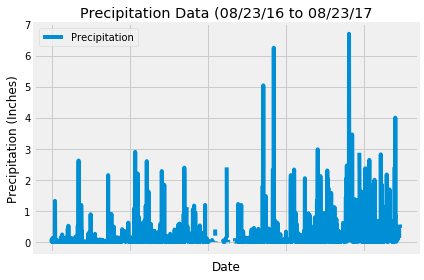

In [39]:
# Use Pandas Plotting with Matplotlib to plot the data

plt.figure(figsize=(12,9))
prcpdf.plot('Date', 'Precipitation')
plt.ylabel('Precipitation (Inches)')
plt.xlabel('Date')
plt.title('Precipitation Data (08/23/16 to 08/23/17')
plt.tight_layout()
plt.show()

In [21]:
# Use Pandas to calcualte the summary statistics for the precipitation data
prcpdf = pd.read_sql(querydt.statement, querydt.session.bind)
prcpdf.rename(columns={'date': 'Date', 'prcp': 'Precipitation'}, inplace=True)
prcpdf.describe()

,Precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [22]:
# Design a query to show how many stations are available in this dataset?
station_count = session.query(func.count(Station.station)).all()
station_count

[(9)]

In [23]:
# Design a query to show how many stations are available in this dataset?
engine.execute('SELECT * FROM station').fetchall()

[(1, 'USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0),
 (2, 'USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6),
 (3, 'USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 21.5213, -157.8374, 7.0),
 (4, 'USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9),
 (5, 'USC00518838', 'UPPER WAHIAWA 874.3, HI US', 21.4992, -158.0111, 306.6),
 (6, 'USC00519523', 'WAIMANALO EXPERIMENTAL FARM, HI US', 21.33556, -157.71139, 19.5),
 (7, 'USC00519281', 'WAIHEE 837.5, HI US', 21.45167, -157.84888999999998, 32.9),
 (8, 'USC00511918', 'HONOLULU OBSERVATORY 702.2, HI US', 21.3152, -157.9992, 0.9),
 (9, 'USC00516128', 'MANOA LYON ARBO 785.2, HI US', 21.3331, -157.8025, 152.4)]

In [24]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
stacounts = (session.query(Measurement.station, func.count(Measurement.station)).\
     group_by(Measurement.station)).\
    order_by(func.count(Measurement.station).desc()).all()
stacounts

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [25]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature most active station?

sel = [func.min(Measurement.tobs),
       func.max(Measurement.tobs),
       func.avg(Measurement.tobs)]

temp_ranges = session.query(*sel).\
    filter (Measurement.station == 'USC00519281').\
    order_by(Measurement.tobs).all()
temp_ranges

[(54.0, 85.0, 71.66378066378067)]

In [26]:
# Choose the station with the highest number of temperature observations.

highest_temps = (session.query(func.count(Measurement.tobs), Measurement.station).\
     group_by(Measurement.station)).\
    order_by(func.count(Measurement.tobs).desc()).all()
highest_temps

[(2772, 'USC00519281'),
 (2724, 'USC00519397'),
 (2709, 'USC00513117'),
 (2669, 'USC00519523'),
 (2612, 'USC00516128'),
 (2202, 'USC00514830'),
 (1979, 'USC00511918'),
 (1372, 'USC00517948'),
 (511, 'USC00518838')]

In [40]:
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

oneyear_temp = session.query(Measurement.date, Measurement.tobs).\
    filter (Measurement.station =='USC00519281').\
    filter(Measurement.date.between('2016-08-23', '2017-08-23')).\
    order_by(Measurement.date.desc())
oneyear_temp

In [41]:
# Save the query results as a Pandas DataFrame and set the index to the date column
oneyear_temp_df = pd.read_sql_query(oneyear_temp.statement, engine)
oneyear_temp_df.head(3)

,date,tobs
0,2017-08-18,79.0
1,2017-08-17,76.0
2,2017-08-16,76.0


<Figure size 864x648 with 0 Axes>

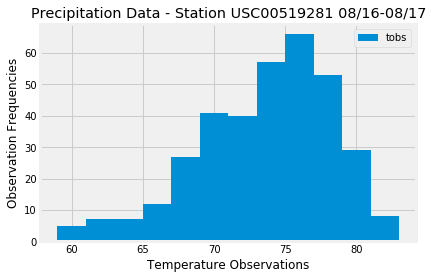

In [42]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
plt.figure(figsize=(12,9))
temp_df = pd.DataFrame(oneyear_temp_df, columns=['tobs'])
temp_df.plot.hist(bins=12)
plt.xlabel("Temperature Observations")
plt.ylabel("Observation Frequencies")
plt.title("Precipitation Data - Station USC00519281 08/16-08/17")
plt.show()

In [30]:
# This function called `calc_temps` will accept 
#start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures 
#for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [31]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.

trip_avg_temp = session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
    filter(Measurement.date >= '2016-02-28').\
    filter(Measurement.date <= '2016-03-05').\
    order_by(func.avg(Measurement.station))
trip_avg_temp

In [32]:
trip_avg_temp_df = pd.read_sql_query(trip_avg_temp.statement, engine)
trip_avg_temp_df.head(3)

,min_1,avg_1,max_1
0,62.0,69.886364,80.0


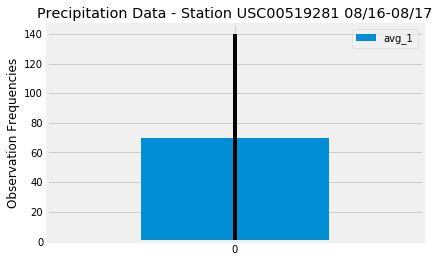

In [33]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.DataFrame(trip_avg_temp_df, columns=['avg_1'])
df.plot.bar(yerr=trip_avg_temp_df, rot=0)

plt.ylabel("Observation Frequencies")
plt.title("Precipitation Data - Station USC00519281 08/16-08/17")
plt.show()

In [34]:
# Calculate the rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation

rainfall = session.query(Station.station,
                  Station.name,                                    
                  Station.latitude,
                  Station.longitude,
                  Station.elevation,
                  func.avg(Measurement.prcp)).\
filter(Measurement.station == Station.station).\
filter(Measurement.date > '2017-03-23').\
filter(Measurement.date < '2017-08-23').\
group_by(Station.station).\
order_by(func.avg(Measurement.prcp).desc()).limit(5).all()
rainfall

[('USC00516128',
  'MANOA LYON ARBO 785.2, HI US',
  21.3331,
  -157.8025,
  152.4,
  0.3993798449612405),
 ('USC00519281',
  'WAIHEE 837.5, HI US',
  21.45167,
  -157.84888999999998,
  32.9,
  0.20949640287769777),
 ('USC00513117',
  'KANEOHE 838.1, HI US',
  21.4234,
  -157.8015,
  14.6,
  0.1496153846153846),
 ('USC00519523',
  'WAIMANALO EXPERIMENTAL FARM, HI US',
  21.33556,
  -157.71139,
  19.5,
  0.12160305343511454),
 ('USC00514830',
  'KUALOA RANCH HEADQUARTERS 886.9, HI US',
  21.5213,
  -157.8374,
  7.0,
  0.11839285714285709)]

## Optional Challenge Assignment

In [35]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

[(62.0, 69.15384615384616, 77.0)]

In [36]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date

normal_temps = session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs), Measurement.date).\
    filter(Measurement.date > '2017-02-25').\
    filter(Measurement.date < '2017-03-05').\
    group_by(Measurement.date)
normal_temps

In [37]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index

normal_temps_df = pd.read_sql_query(normal_temps.statement, engine)
normal_temps_df.set_index('date', inplace=True)
normal_temps_df.head()

,min_1,avg_1,max_1
date,,,
2017-02-26,63.0,66.833333,75.0
2017-02-27,65.0,69.857143,77.0
2017-02-28,69.0,72.285714,74.0
2017-03-01,64.0,69.000000,73.0
2017-03-02,72.0,73.166667,75.0


<Figure size 864x648 with 0 Axes>

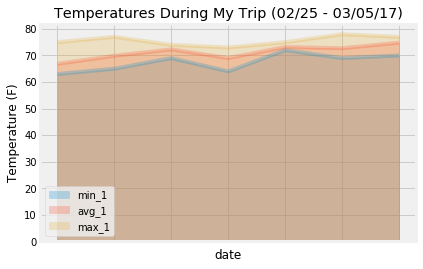

In [38]:
# Plot the daily normals as an area plot with `stacked=False`
import matplotlib.dates as mdates

plt.figure(figsize=(12,9))

df = pd.DataFrame(normal_temps_df, columns=['min_1', 'avg_1', 'max_1'])
df.plot(kind='area', stacked=False, alpha=0.25)


plt.legend(loc='lower left')
plt.title('Temperatures During My Trip (02/25 - 03/05/17)')
plt.ylabel('Temperature (F)')
plt.show()